In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

from numpy import genfromtxt
from matplotlib import ticker, cm
from matplotlib.patches import Rectangle
from numpy import inf
from numpy import NaN

In [2]:
##################### INPUT ##################### 
#LL info
alphas = [5]
ics = [6]
noises = [1,3,4]
ms = [1,2,4]
beta=[4]
#FI info
bifurcation_type = 1
reduction_method = 2
logging = True


In [3]:
##################### help functions ##################### 
def get_fi_alps(alp_ind):
    alp = [-1.5,-0.8,-0.5,-0.2, 0, 0.2,0.5,0.8,1.5]
    news =[]
    for i in alp_ind:
        #print('i',i)
        real_value = alp[i-1]   
        #print('real_value',real_value)
        ratio_value = abs((-2)-(real_value))/4
        #print('ratio_value',ratio_value)
        new_value = (ratio_value*60)
        #print('new_value',new_value)
        news.append(new_value)
    return news

def get_fi_ics(ics_ind):
    ics= [-1,-0.6,-0.4,-0.1,0,0.1,0.4,0.6,1]
    news =[]
    for i in ics_ind:  
        real_value = ics[i-1]
        ratio_value = abs((-2)-(real_value))/4
        new_value = (ratio_value*41)
        news.append(new_value)
    return news

def get_ll_alps_one(alp_ind):
    #print('alp_ind',alp_ind)
    alp = [-1.5,-0.8,-0.5,-0.2, 0, 0.2,0.5,0.8,1.5]
    real_value = alp[alp_ind-1]
    #print('real_value',real_value)
    ratio_value = abs((-2)-(real_value))/4
    #print('ratio_value',ratio_value)
    new_value = (ratio_value)*10
    #print('new_value',new_value)
    return new_value

def get_ll_ics_one(ics_ind):
    #print('ics_ind',ics_ind)
    ics= [-1,-0.6,-0.4,-0.1,0,0.1,0.4,0.6,1]
    real_value = ics[ics_ind-1]
    #print('real_value',real_value)
    ratio_value = abs((-2)-(real_value))/4
    #print('ratio_value',ratio_value)
    new_value = (ratio_value)*10
    #print('new_value',new_value)
    
    return new_value    
def read_ll_file(alpha,init,bifurcation_type,noise,m):
    path_to_file= "/home/elisabeth/master_data/er4517/public_html/assets/js/ll/"
    name=str(bifurcation_type)+"_"+str(m)+"_"+str(noise)+"_"+str(alpha)+"_"+str(init)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    #csv2=np.nan_to_num(csv)
    #print(csv2)
    #THINK ABOUT THIS LINE!!!!
    csv[csv == -inf] = -1000
    return csv

def read_ll_file_sde(alpha,init,bifurcation_type,noise,m,beta):
    path_to_file= "/home/elisabeth/master_data/er4517/public_html/assets/js/ll/"
    name=str(bifurcation_type)+"_"+str(m)+"_"+str(noise)+"_"+str(alpha)+"_"+str(init)+"_"+str(beta)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    #csv2=np.nan_to_num(csv)
    #print(csv2)
    #THINK ABOUT THIS LINE!!!!
    csv[csv == -inf] = -1000
    return csv

def read_fish_file(bifurcation_type,reduction_method,logging):
    path_to_file= "/home/elisabeth/master_data/er4517/public_html/assets/js/fish_data/"
    name=str(bifurcation_type)+"_"+str(reduction_method)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    if(logging):
        csv[np.isnan(csv)]=3
        out_array = np.log(csv) 
        return out_array
    else:
        csv[np.isnan(csv)]=3
        return csv

def make_ll_plot(ax,csv,ind):
    #countouring=ax.contourf(csv,30,cmap='Reds', alpha=0.9,linecolor='white',vmin=-1000, vmax=0)
    al_plot_nr = get_ll_alps_one(alphas[ind])
    ic_plot_nr = get_ll_ics_one(ics[ind])
    
    alpha_x_ticks = [-2,-1,0,1,2]
    alpha_x_ticks_loc = [0,2.5,5,7.5,10]
    inits_y_ticks = alpha_x_ticks
    alpha_y_ticks_loc = alpha_x_ticks_loc
    texts=["a","b","c","d","e"]
    
    plt.annotate(texts[ind], (al_plot_nr+0.7, ic_plot_nr+0.7) ,size=20,color='black')
    plt.plot([al_plot_nr],[ic_plot_nr],marker="x",label="Truth",color="white",markersize=16,markerfacecolor='gold',markeredgewidth=1.5, markeredgecolor="gold")
    if (np.isfinite(csv).any()):   
        ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
        ax.set_facecolor('white')
        #print(csv)
        countouring=ax.contourf(csv,30,cmap='Reds',alpha=0.9,vmin=-1000, vmax=0)
        plt.xticks(alpha_x_ticks_loc,alpha_x_ticks)
        plt.yticks(alpha_y_ticks_loc,inits_y_ticks)
        plt.xlabel("α")
        plt.ylabel("IC")
        #plt.legend(loc='upper left')
        cbar = fig.colorbar(countouring,fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        #cbar.ax.set_yticklabels(['High',  'Low'], rotation=90) 
        return countouring
    else:      
        print("eieiei")
        
        csv[csv == -inf] = -1000
        #print(csv)
        countouring=ax.contourf(csv,39,cmap='Reds',alpha=0.9,vmin=-1000, vmax=0)
        plt.xticks(alpha_x_ticks_loc,alpha_x_ticks)
        plt.yticks(alpha_y_ticks_loc,inits_y_ticks)
        plt.xlabel("α")
        plt.ylabel("IC")
        cbar = fig.colorbar(countouring,fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        return("eieieie")
def make_fish_plots(csv):
    my_alps= get_fi_alps(alphas)
    my_ics= get_fi_ics(ics)
    ax_main = fig.add_subplot(3,3,5)
    ax_main.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
    ax_main.set_facecolor('white')
    plt.xticks([0,15,30,45,60],[-2,-1,0,1,2])
    plt.yticks([0,10,20,30,40],[-2,-1,0,1,2])
    plt.xlabel("Bifurcation parameter α")
    plt.ylabel("Initial condition IC") 
    countouring=ax_main.contourf(np.transpose(csv),cmap='Blues',alpha=0.9)
    cbar = fig.colorbar(countouring,fraction=0.09)
    cbar.ax.set_ylabel('Fisher information')
    plt.plot(my_alps,my_ics,marker="x",linestyle='None',label="Truth",color="white",markersize=16,markerfacecolor='gold',markeredgewidth=1.5, markeredgecolor="gold")
    texts=["a","b","c","d","e"]
    for i in range(5):
        plt.annotate(texts[i], (my_alps[i]+0.7, my_ics[i]+0.7) ,size=20,color='black')
    ic_plot=fi_ic(csv)
    alpha_plot=fi_alpha(csv)
    return countouring,ic_plot,alpha_plot

def fi_alpha(csv):
    ax_alpha = fig.add_subplot(3,3,2)
    plt.xlabel("Bifurcation parameter α")
    plt.ylabel("Marginal Fisher Information")
    plt.gca().invert_xaxis()
    plt.xticks([0,15,30,45,60],[-2,-1,0,1,2])
    #plt.yticks([0,10,20,30,40],[-2,-1,0,1,2])
    finit_sums=[]
    for j in range(len(csv)):
        j_sum = 0
        for i in csv[j]:
            if np.isfinite(i):
                j_sum+=i
        finit_sums.append(j_sum)
    plt.gca().invert_xaxis()
    alpha_side = ax_alpha.plot(range(len(finit_sums)),finit_sums) 
    cbar = fig.colorbar(countouring,ticks=range(2),fraction=0.09)
    cbar.ax.set_ylabel('')
    #cbar.ax.add_patch(Rectangle((1, 1), 50, 30, facecolor='red'))
    #right = ax_right.plot(range(len(finit_sums)),finit_sums) 
    return alpha_side

def fi_ic(csv):
    ax_ic = fig.add_subplot(3,3,4)  
    plt.ylabel("Initial Condition")
    plt.xlabel("Marginal Fisher Information")
    #plt.xticks([0,15,30,45,60],[-2,-1,0,1,2])
    plt.yticks([0,10,20,30,40],[-2,-1,0,1,2])
    ax_ic.yaxis.set_label_position('left')
    finit_sums=[]    
    for j in range(len(csv[1])):
        j_sum = 0
        for i in range(len(csv)):
            if np.isfinite(csv[i][j]):
                j_sum+=csv[i][j]
        finit_sums.append(j_sum)
    ic_side = ax_ic.plot(finit_sums,range(len(finit_sums)))
    plt.gca().invert_xaxis()
    cbar = fig.colorbar(countouring,ticks=range(2),fraction=0.09)
    cbar.ax.set_ylabel('')
    
    
    #right = ax_right.plot(range(len(finit_sums)),finit_sums) 
    return ic_side

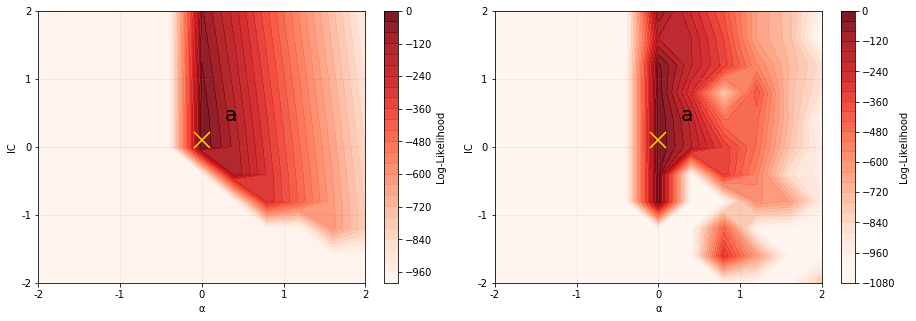

In [8]:
fig = plt.figure(figsize=(15,5))


alpha = alphas[0]
ic = ics[0]     
csv=read_ll_file(alpha,ic,bifurcation_type,1,1)
ax = fig.add_subplot(1,2,1)
countouring= make_ll_plot(ax,csv,0)
  
csv=read_ll_file_sde(alpha,ic,bifurcation_type,1,1,4)
ax = fig.add_subplot(1,2,2)
countouring= make_ll_plot(ax,csv,0)





plt.savefig(str(bifurcation_type)+'ll_sde.pdf')
plt.show()

In [ ]:
alpha = alphas[1]
ic = ics[1]     
csv=read_ll_file(alpha,ic,bifurcation_type)
ax = fig.add_subplot(3,3,6)
countouring= make_ll_plot(ax,csv,1)

alpha = alphas[4]
ic = ics[4]     
csv=read_ll_file(alpha,ic,bifurcation_type)
ax = fig.add_subplot(3,3,7)
countouring= make_ll_plot(ax,csv,4)

alpha = alphas[3]
ic = ics[3]     
csv=read_ll_file(alpha,ic,bifurcation_type)
ax = fig.add_subplot(3,3,8)
countouring= make_ll_plot(ax,csv,3)
    
alpha = alphas[2]
ic = ics[2]     
csv=read_ll_file(alpha,ic,bifurcation_type)
ax = fig.add_subplot(3,3,9)
countouring= make_ll_plot(ax,csv,2)


#fish
#csv = read_fish_file(bifurcation_type,reduction_method,logging)
#countouring,ic_side,alpha_side = make_fish_plots(csv)



plt.savefig(str(bifurcation_type)+'all_ll_new.pdf')
